### Minería de Datos y Modelización Predictiva ⛏👷‍♂️
**Master en Big Data & Data Science - Universidad Complutense de Madrid**

**Santiago Torres Busquets**

## Ejercicio 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

#Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Lectura del dataset y EDA**

In [2]:
df3 = pd.read_excel('C:/Users/Santiago/Documents/Santiago/Maestria/UCM/Modulos/Mineria de Datos y Modelizacion Predictiva/Tarea Mineria de Datos/wisconsin.xlsx')
df3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 32)

In [4]:
df3.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df3.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Ante un análisis exploratorio nos encontramos con un dataset de 30 variables, una variable *diagnosis* que refleja la categoría binaria que tomaremos como variable objetivo. También observamos la variable "id" que descartaremos de entrada al no poseer capacidad predictora para nuestro análisis.

In [6]:
df3_num = df3.drop(['id','diagnosis'], axis=1)

In [7]:
df3_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Matriz de correlaciones - *heatmap*

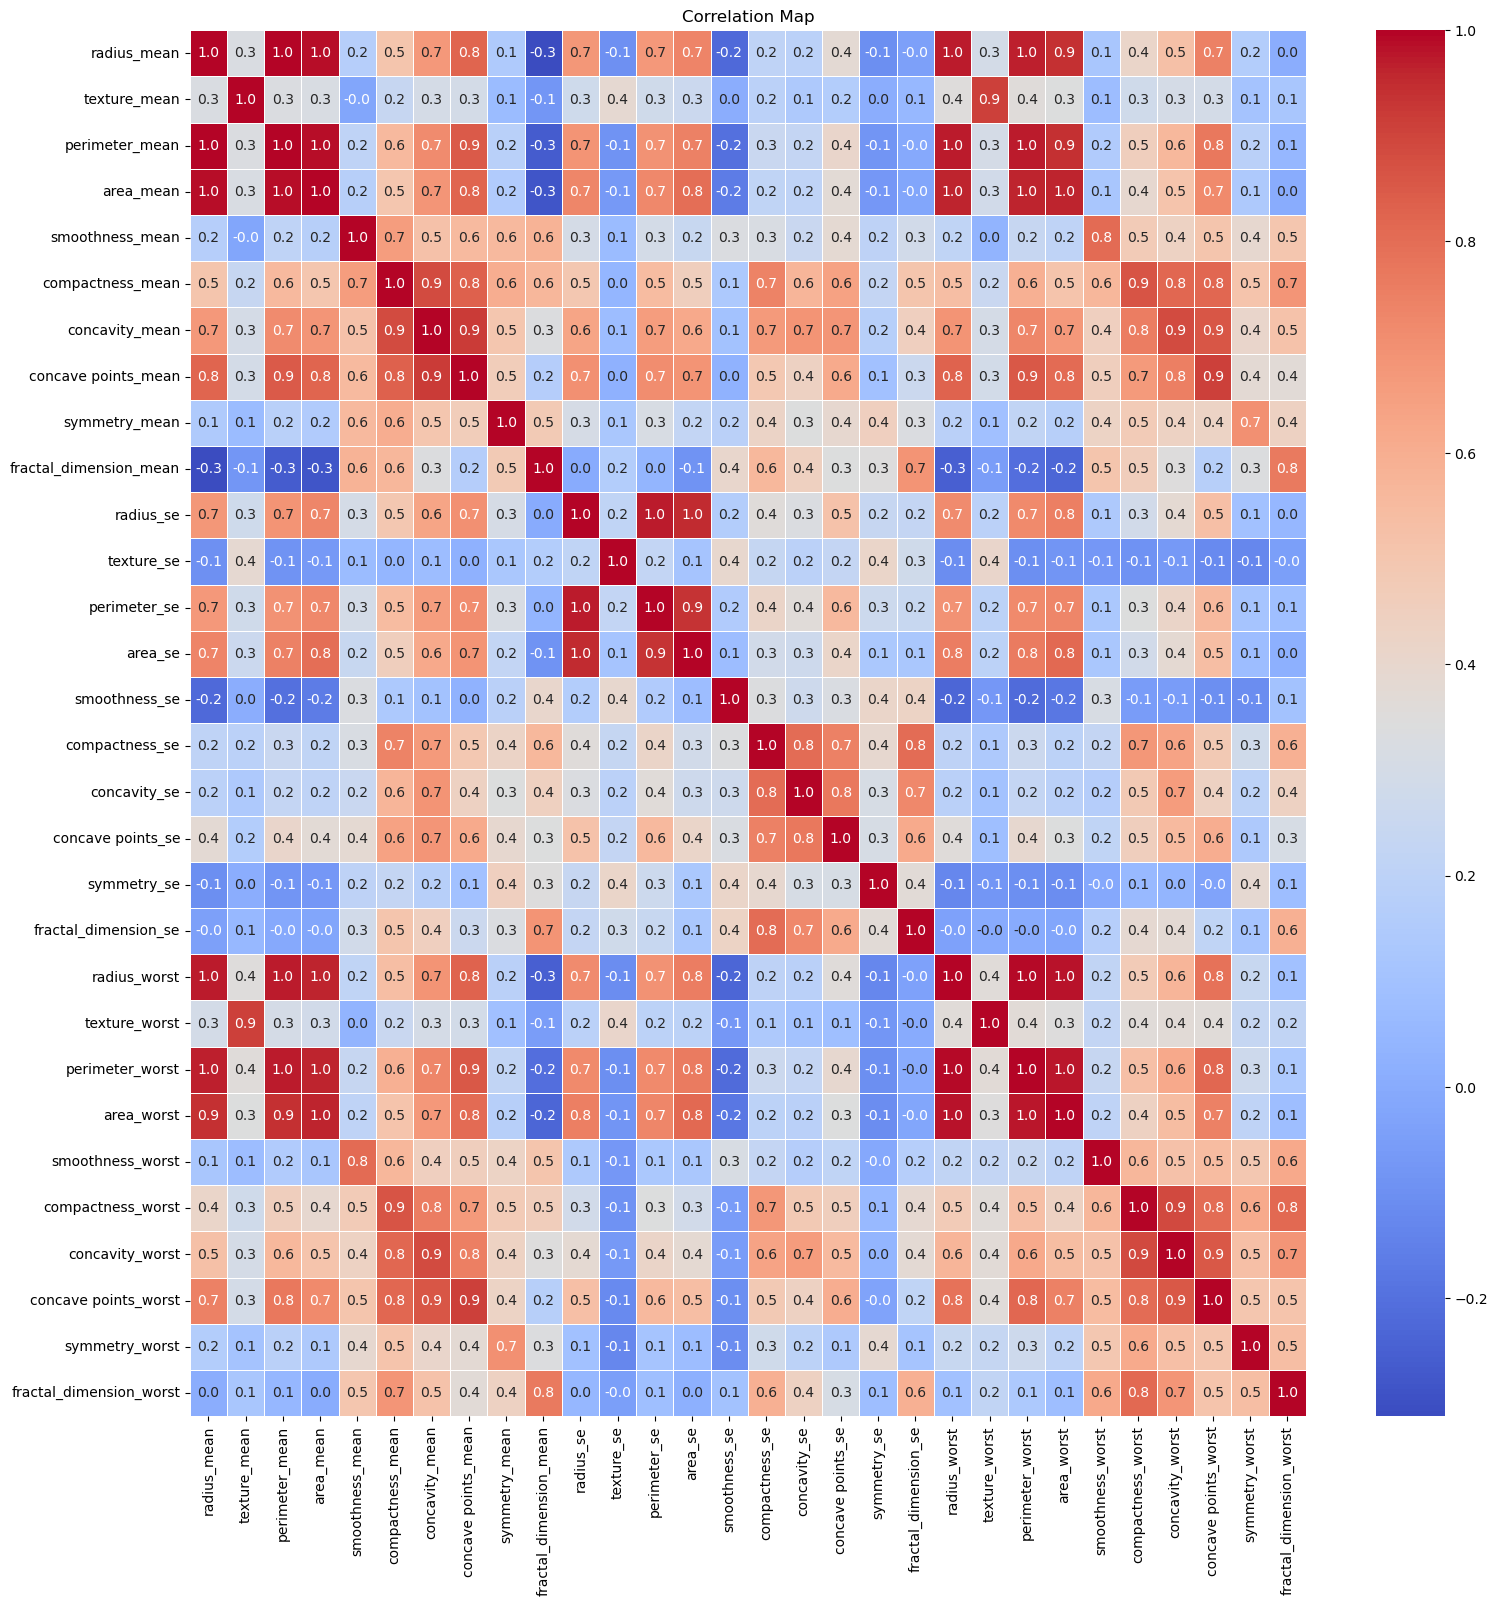

In [8]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df3_num.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax,cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

Al ser la variable objetivo *diagnosis* de tipo categórica y dicotómica, considero que un modelo de regresión logística sería adecuado.

En la matriz de correlaciones podemos observar que hay bastante correlacion entre pedictores, como podría suponerse dado el hecho que parecieran ser tres grupos de diez predictores, diferenciandose en pequeños valores. Dada esta relación que indicaría la presencia de multicolinealidad, podrían tomarse distintos métodos para reducir la dimensionalidad a la hora de generar un modelo predictivo, como el PCA.

### Valoración de la adecuación muestral a priori

Antes de ejecutar un análisis de componentes principales para reducir la dimensionalidad del dataset, debemos comprobar las condiciones iniciales de alta correlación.

In [9]:
from scipy.stats import pearsonr

# Transpone los datos para que las variables sean las columnas
data = np.transpose(df3_num)

# Calcula la matriz de p-valores de correlación
p_values = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        corr, p_val = pearsonr(data[i], data[j])
        p_values[i, j] = p_val

# Revisar la matriz de p-valores de correlación para comprobar si hay p > 0.05
# True si hubiese p-valores > 0.05
# False si no hubiese p-valores > 0.05
print(bool(p_values[p_values > 0.05]))

False


Podemos lograr el mismo resultado con el test de esfericidad de bartlett contemplando que queremos rechazar la $H_0$ de que los predictores no están correlacionados.

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df3_num)

(39362.120841135045, 0.0)

Rechazamos entonces la hipótesis nula de que los datos están en un conjunto hiperesférico.

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(df3_num)

(array([0.83463512, 0.64352613, 0.85334054, 0.86403253, 0.814716  ,
        0.87939755, 0.89192843, 0.90027723, 0.82510264, 0.83181381,
        0.83412178, 0.48458942, 0.84290718, 0.85199881, 0.64427854,
        0.8712978 , 0.82547994, 0.83516673, 0.5832182 , 0.81149623,
        0.82308704, 0.60329755, 0.88493799, 0.82044529, 0.75316064,
        0.85127714, 0.90222587, 0.89105242, 0.69074764, 0.81233969]),
 0.8322253094651043)

Del índice KMO-MSA podemos observar que la mayoría de los valores son superiores a 0.7 por lo que la muestra es aceptable para el análisis de componentes principales.

### Principal Component Analysis

**Escalado de datos**

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(df3_num)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


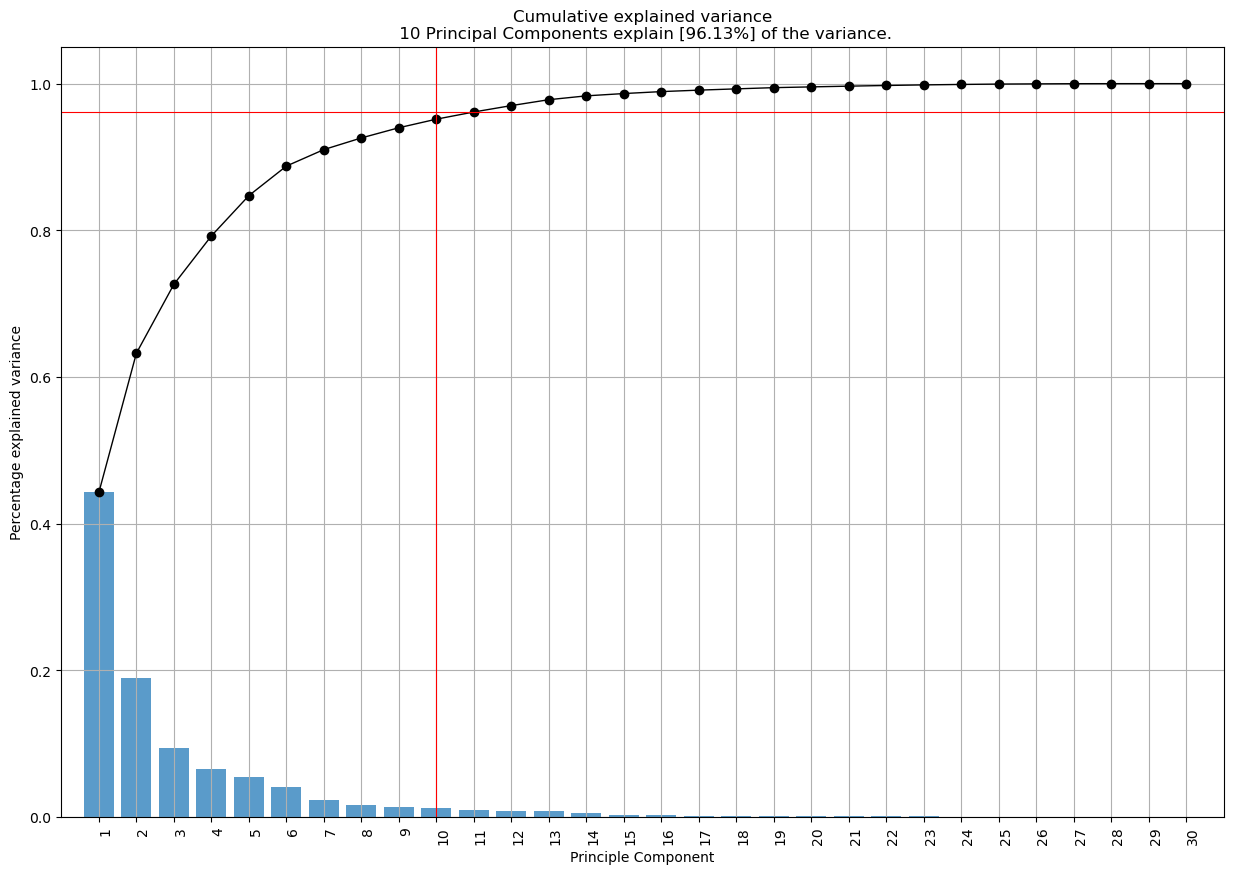

<Figure size 640x480 with 0 Axes>

In [13]:
# Load library
from pca import pca

# Initialize pca with default parameters
pca1 = pca(normalize=True)

# Fit transform
results = pca1.fit_transform(X)

# Plot the explained variance
pca1.plot();

In [14]:
pca1.results

{'loadings':              1         2         3         4         5         6         7  \
 PC1   0.218902  0.103725  0.227537  0.220995  0.142590  0.239285  0.258400   
 PC2  -0.233857 -0.059706 -0.215181 -0.231077  0.186113  0.151892  0.060165   
 PC3  -0.008531  0.064550 -0.009314  0.028700 -0.104292 -0.074092  0.002734   
 PC4   0.041409 -0.603050  0.041983  0.053434  0.159383  0.031795  0.019123   
 PC5   0.037786 -0.049469  0.037375  0.010331 -0.365089  0.011704  0.086375   
 PC6   0.018741 -0.032179  0.017308 -0.001888 -0.286374 -0.014131 -0.009344   
 PC7  -0.124088  0.011400 -0.114477 -0.051653 -0.140669  0.030918 -0.107520   
 PC8  -0.007452  0.130675 -0.018687  0.034674 -0.288975 -0.151396 -0.072827   
 PC9  -0.223110  0.112699 -0.223739 -0.195586  0.006425 -0.167841  0.040591   
 PC10  0.095487  0.240935  0.086386  0.074957 -0.069293  0.012936 -0.135604   
 
              8         9        10  ...        21        22        23  \
 PC1   0.260854  0.138167  0.064363  ...  0

De la visualización podemos observar que para retener el 70% de la variabilidad se debería escoger al menos **3 componentes**, y con 10 componentes se llegaría al 96,13% de variabilidad explicada.

In [15]:
pca1.results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
1.0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1.0,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
1.0,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454276
1.0,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
1.0,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377704
...,...,...,...,...,...,...,...,...,...,...
1.0,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256988
1.0,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105208,-0.108632
1.0,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520878
1.0,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542034,-0.089297


In [16]:
pca1.results['explained_var']

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

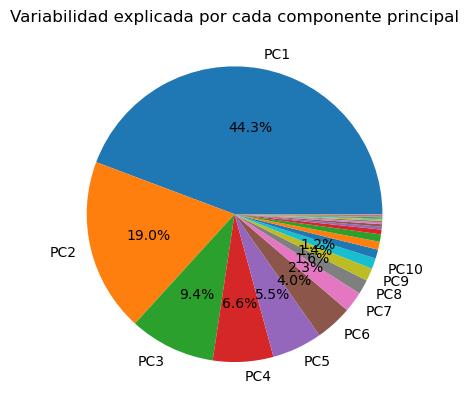

In [17]:
labels = []
def my_autopct(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

for i in range(len(df3_num.columns)):
    if i < 10:
        labels.append(f'PC{i+1}')
    else:
        labels.append('')
        
plt.pie(pca1.results['variance_ratio'], labels=labels, autopct=my_autopct, textprops={'visible': True})
plt.title('Variabilidad explicada por cada componente principal')
plt.show()

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].


<Figure size 600x400 with 0 Axes>

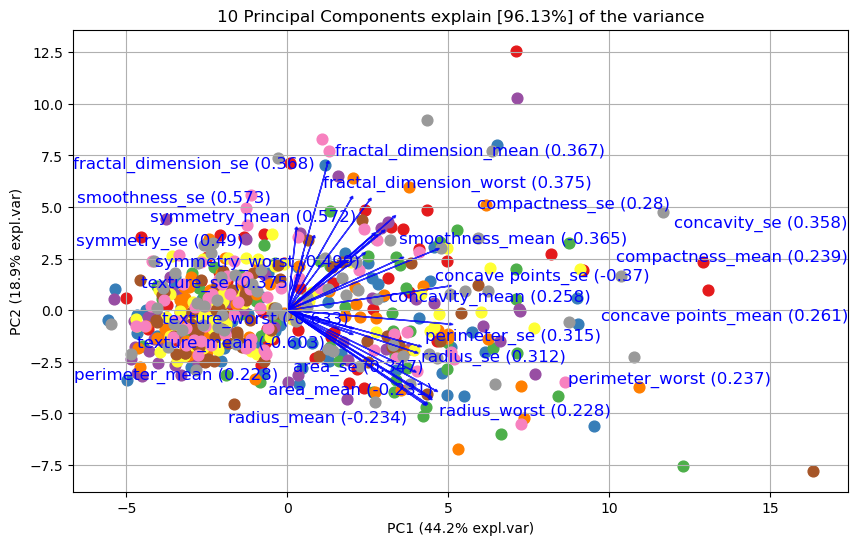

In [43]:
pca0 = pca(normalize=True)
results = pca0.fit_transform(df3_num)
fig = plt.figure(figsize=(6, 4))
pca0.biplot(legend=False, color_arrow='b', figsize=(10, 6), label=False);

A priori observamos que el PCA tiene muchos componentes que estan correlacionados y con módulos grandes. El PC1 explica el 44,2 de la variabilidad, y debería reducirse aún mas la interpretabilidad para una mejor interpretación.

In [18]:
# Creo dataframe con 3 componentes principales
pca2 = PCA(n_components=3)
scores = pca2.fit_transform(X)
df3_pca = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
df3_pca.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123152
1,2.387802,-3.768172,-0.529289
2,5.733896,-1.075174,-0.551751
3,7.122953,10.275589,-3.232785
4,3.935302,-1.948071,1.389782


Matriz de correlaciones de los 3 componentes principales, para descartar multicolinealidad entre los componentes resultantes:

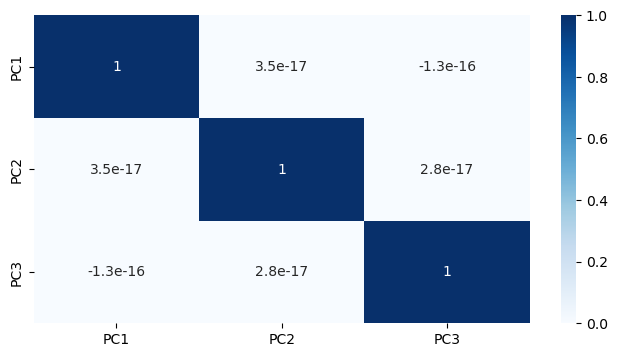

In [19]:
corr_matrix = df3_pca.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

Transformamos las etiquetas de la variable objetivo en 0 y 1 para poder así proceder con la regresión logística:

In [20]:
df3.diagnosis = df3.diagnosis.map({'B':0, 'M':1})

Definimos la matriz de predictores X con los 3 componentes principales y la variable objetivo y:

In [21]:
X = df3_pca
y = df3.diagnosis

### Regresión Logística

Como comentaba anteriormente, teniendo en cuenta la variable objetivo dicotómica es aconsejable ejecutar un modelo de regresión logística para un modelo predictivo de clasificación.

In [22]:
import statsmodels.api as sm
# Add a constant to the independent variables (required by statsmodels)
X = sm.add_constant(X)

# Create a logistic regression model object
logit_model=sm.Logit(y, X)

# Fit the model to the data
result=logit_model.fit()

# Print the summary of the logistic regression model
result.summary()

Optimization terminated successfully.
         Current function value: 0.108409
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                  0.8358
Time:                        22:03:21   Log-Likelihood:                -61.685
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.278e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6762      0.242     -2.796      0.005      -1.150      -0.202
PC1            2.3183      0.304      7.616      0.000       1.722       2.915
PC2           -1.2829      0.212     -6.059      0.000      -1.698      -0.868
PC3           -0.4878      0.141     -3.468      0.001      -0.764      -0.212
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Cross Validation y matriz de confusión

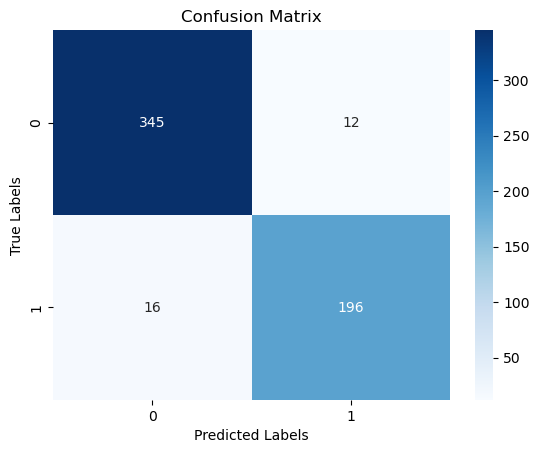

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Perform 5-fold cross-validation
predicted = cross_val_predict(model, X, y, cv=5)

# Create a confusion matrix using the predicted class labels and the actual class labels
conf_mat = confusion_matrix(y, predicted)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True,fmt=".0f", cmap="Blues")

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

**Métricas del modelo de Regresión Logística por validación cruzada**

In [25]:
from sklearn.metrics import classification_report

# Calculate classification metrics from the confusion matrix
report = classification_report(y,predicted)

# Print the classification report to the console
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       357
           1       0.94      0.92      0.93       212

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



Luego de definir la regresión logística se realiza la validación cruzada y así obtengo matriz de confusión y su reporte clasificatorio. Con los resultados obtenidos podemos observar que el modelo presenta una capacidad predictora del 95%, tomando como imput los tres componentes principales.

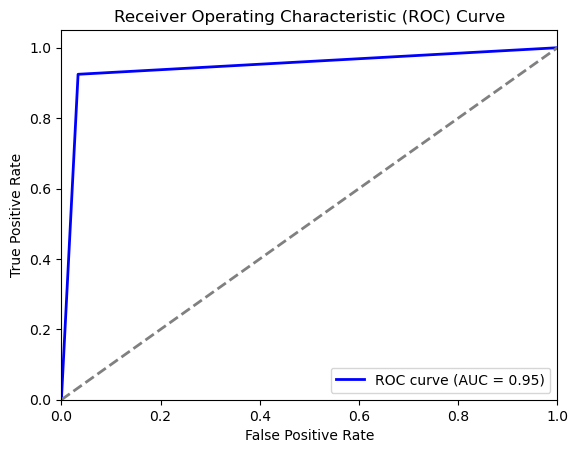

In [26]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and the area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y,predicted)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

También se procede a obtener la curva ROC, que contempla bajo una capacidad predictiva muy potente con un AUC (area bajo la curva) del **95%**.

### Conclusiones

En base a la tabla de coeficientes obtenida por el modelo, se puede definir la fórmula del modelo de regresión logística de la siguiente manera:

$$logit(p) = -0.6762 + 2.3183PC1 - 1.2829PC2 - 0.4878 * PC3$$

y la probabilidad del diagnóstico igual a 1, es decir *maligno*, vendría dada por:

$$p = 1 / (1 + e^{(-logit(p)})$$

donde PC1, PC2 y PC3 son las componentes principales provenientes de las variables predictoras.